### IMPORT PANDAS


In [60]:
import pandas as pd


### Import and store `peace_index` file into the variable df standing for dataframe

In [61]:
df = pd.read_csv ("student_marks.csv", index_col="Student_ID")

df.head()

,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12
Student_ID,,,,,,,,,,,,
22000,78,87,91,91,88,98,94,100,100,100,100,93
22001,79,71,81,72,73,68,59,69,59,60,61,67
22002,66,65,70,74,78,86,87,96,88,82,90,86
22003,60,58,54,61,54,57,64,62,72,63,72,76
22004,99,95,96,93,97,89,92,98,91,98,95,88


### Check for number of `Null Values`, `Columns` and `Rows`
### - Rename variable df to no_null_df

In [62]:
df.info()
no_null_df = df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 22000 to 22055
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Test_1   56 non-null     int64
 1   Test_2   56 non-null     int64
 2   Test_3   56 non-null     int64
 3   Test_4   56 non-null     int64
 4   Test_5   56 non-null     int64
 5   Test_6   56 non-null     int64
 6   Test_7   56 non-null     int64
 7   Test_8   56 non-null     int64
 8   Test_9   56 non-null     int64
 9   Test_10  56 non-null     int64
 10  Test_11  56 non-null     int64
 11  Test_12  56 non-null     int64
dtypes: int64(12)
memory usage: 5.7 KB


### Check null-free data frame for any `Duplicates Rows` and sort
#### Rename no_null_df variable with no_dup_df once all duplicates-if any-have been dropped

In [63]:
no_null_df.duplicated().sort_values()
no_dup_df = no_null_df

### Calculate descriptive statistics as variable `descript_stats variable`

In [64]:
descript_stats = no_dup_df.describe()
descript_stats

,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,70.750000,69.196429,68.089286,67.446429,67.303571,66.000000,66.160714,65.303571,64.392857,64.250000,64.517857,65.928571
std,17.009356,17.712266,18.838333,19.807179,20.746890,21.054043,21.427914,22.728372,23.211814,22.598673,22.610529,22.464402
min,40.000000,34.000000,35.000000,28.000000,26.000000,29.000000,26.000000,19.000000,9.000000,12.000000,19.000000,20.000000
25%,57.750000,55.750000,53.000000,54.500000,53.750000,50.250000,47.000000,45.750000,44.000000,45.750000,46.750000,46.750000
50%,70.500000,68.500000,70.000000,71.500000,69.000000,65.500000,64.000000,67.500000,65.500000,65.500000,64.000000,67.500000
75%,84.000000,83.250000,85.000000,84.000000,85.250000,83.750000,85.250000,83.250000,84.250000,83.250000,84.000000,86.500000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### Calculate the `mean`, `Test with the highest average score` and `Test with the lowest average score` while creating variables relating to each value

#### Test `mean`

In [65]:
test_means = df.mean()
test_means

Test_1     70.750000
Test_2     69.196429
Test_3     68.089286
Test_4     67.446429
Test_5     67.303571
Test_6     66.000000
Test_7     66.160714
Test_8     65.303571
Test_9     64.392857
Test_10    64.250000
Test_11    64.517857
Test_12    65.928571
dtype: float64

#### Test with `Highest Average Score`

In [66]:
highest_avg_test = test_means.idxmax()
highest_avg_test

'Test_1'

#### Test with `Lowest Average Score`

In [67]:
lowest_avg_test = test_means.idxmin()
lowest_avg_test

'Test_10'

### Import matplotlib module to visually plot data

In [68]:
import matplotlib.pyplot as plt

### Visualize the distribution of scores for each test using `histograms`

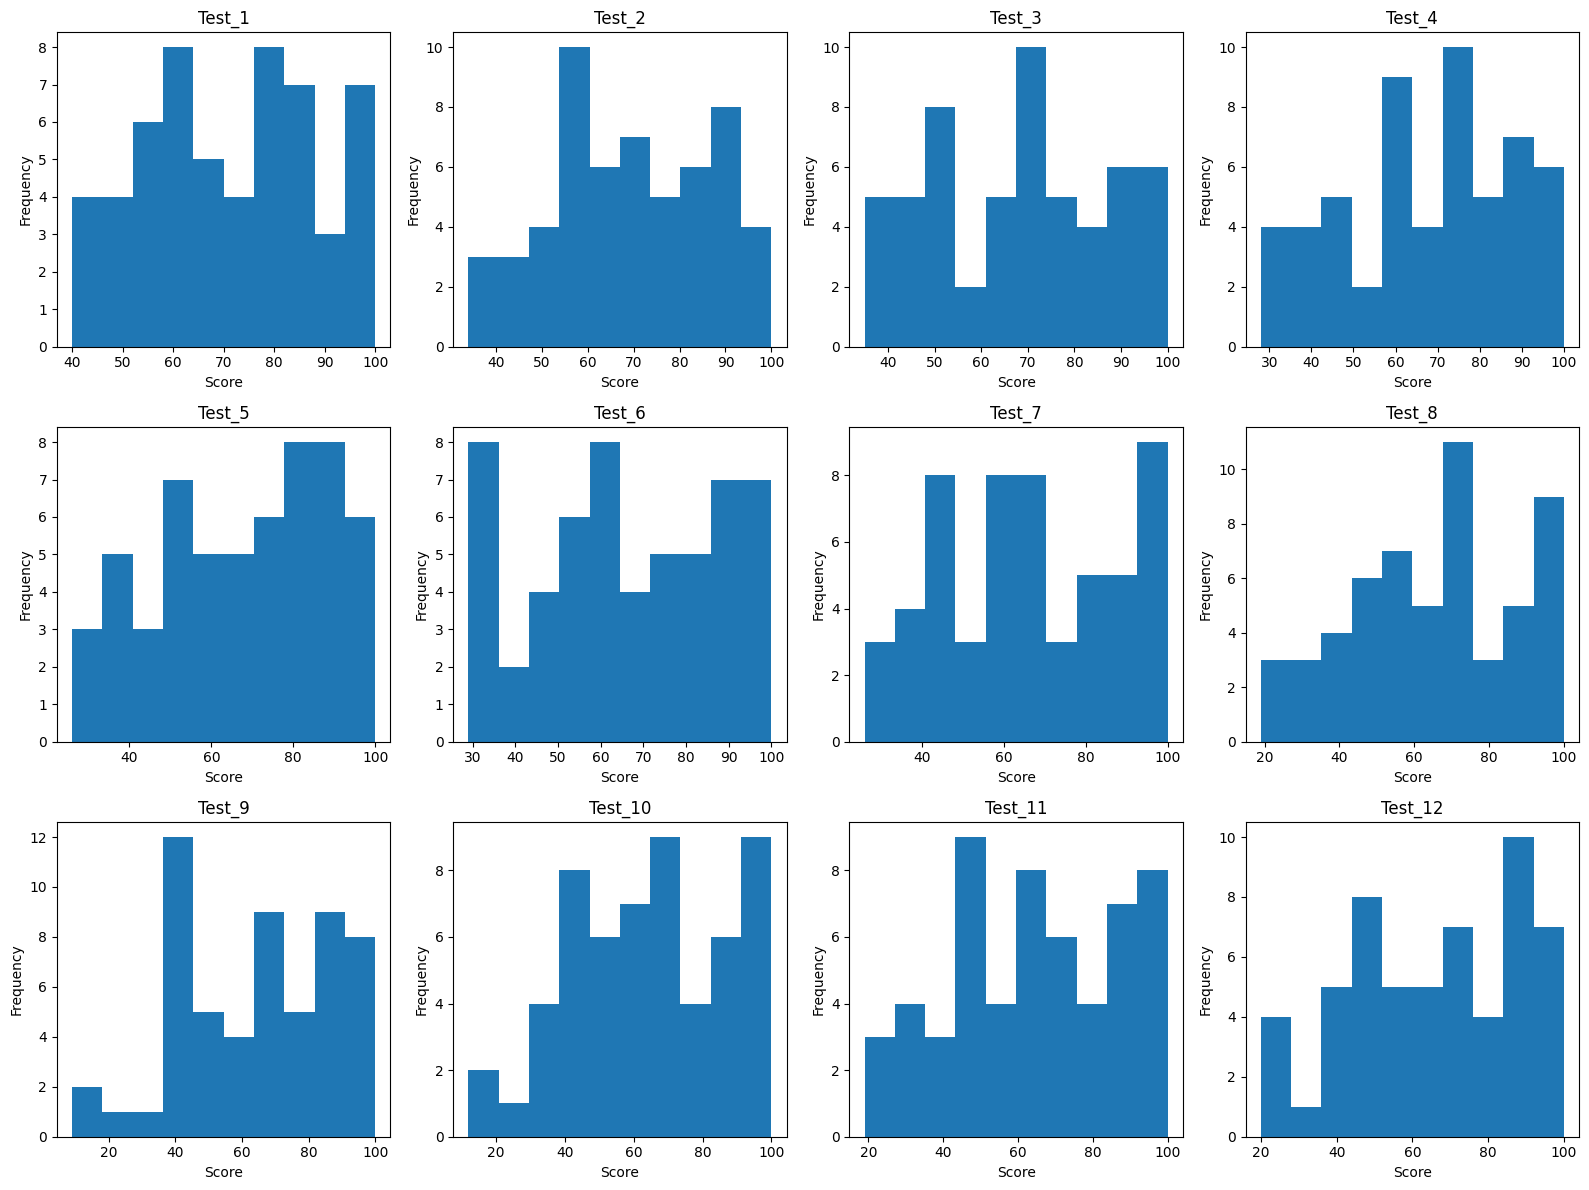

In [69]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))


for i, col in enumerate(df.columns[:]):
    ax = axes[i // 4, i % 4]
    df[col].plot(kind='hist', ax = ax, title = col)
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')

plt.tight_layout()
# plt.show()

#### Visualize the distribution of scores for each test using `box plots`

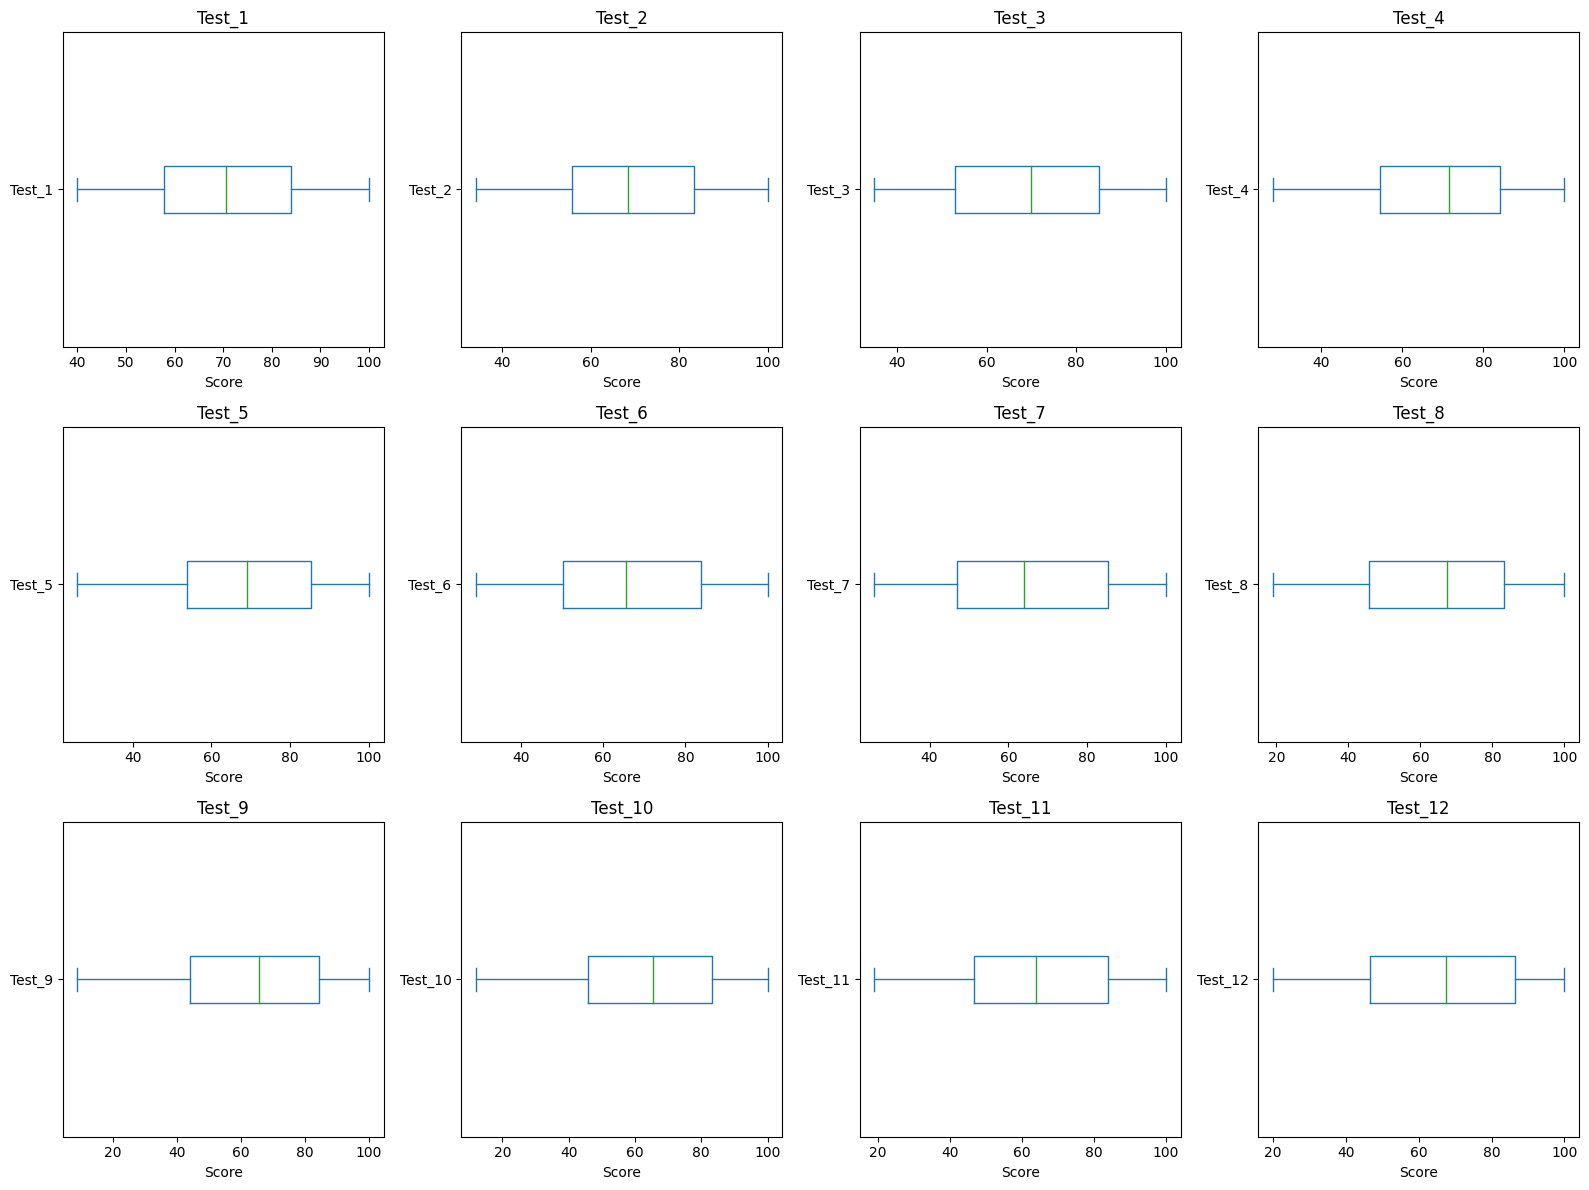

In [70]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))

for i, col in enumerate (df.columns[:]):
    ax = axes[i // 4, i % 4]
    df[col].plot(kind='box', ax=ax, vert=False, title=col)
    ax.set_xlabel('Score')

plt.tight_layout()
# plt.show()

## Trend Analysis

#### Create a list of test names

In [71]:
test_names = df.columns[:]
test_names

Index(['Test_1', 'Test_2', 'Test_3', 'Test_4', 'Test_5', 'Test_6', 'Test_7',
       'Test_8', 'Test_9', 'Test_10', 'Test_11', 'Test_12'],
      dtype='object')

#### Plot the trend of scores across tests using a `line graph`

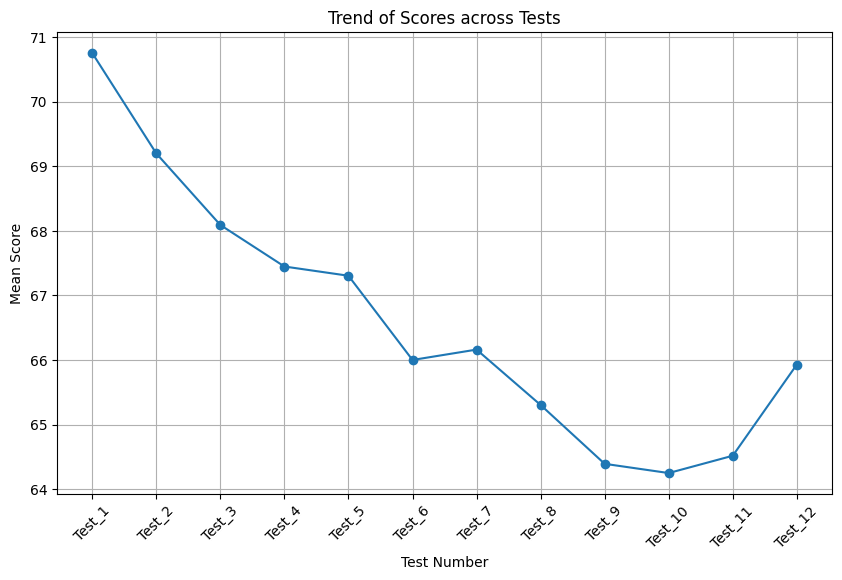

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(test_names, test_means[:], marker='o')
plt.title("Trend of Scores across Tests")
plt.xlabel('Test Number')
plt.ylabel("Mean Score")
plt.xticks(rotation=45)
plt.grid(True)
# plt.show()

#### Plot the trend of scores across tests using a bar `chart`

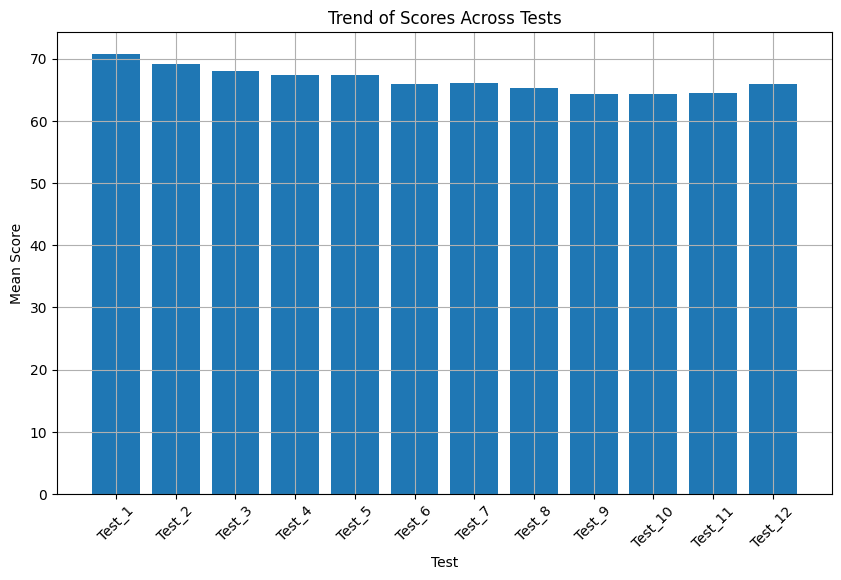

In [73]:
plt.figure(figsize=(10,6))
plt.bar(test_names, test_means[:])
plt.title('Trend of Scores Across Tests')
plt.xlabel('Test')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.grid(True)
# plt.show()

### Import seaborn as sns 

In [74]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

### Identify any patterns by calculating the correlation matrix and visualize using a heatmap

##### Calculate the correlation matrix

In [ ]:
corr_matrix = df.corr()

##### Visualize the correlation matrix using a heatmap

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Test Scores')
plt.show()